In [711]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
score_data = pd.read_csv('/kaggle/input/titanic/test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [712]:
score_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [713]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [714]:
score_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [715]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [716]:
score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [717]:
train_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [718]:
train_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [719]:
train_data = train_data.drop(columns=['Ticket', 'PassengerId', 'Name', 'Cabin'])
score_data = score_data.drop(columns=['Ticket', 'PassengerId', 'Name', 'Cabin'])

train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [720]:
embarked_mean = train_data['Embarked'].mode().values[0]
embarked_mean

'S'

In [721]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_embarked = LabelEncoder()

train_data['Embarked'] = train_data['Embarked'].fillna(embarked_mean)
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

train_data['Sex'] = le_sex.fit_transform(train_data['Sex'])
train_data['Embarked'] = le_embarked.fit_transform(train_data['Embarked'])
train_data['Kin'] = train_data['SibSp'] + train_data['Parch']
train_data.drop(columns=['SibSp', 'Parch'])


score_data['Embarked'] = score_data['Embarked'].fillna(embarked_mean)
score_data['Age'] = score_data['Age'].fillna(score_data['Age'].mean())
score_data['Fare'] = score_data['Fare'].fillna(score_data['Fare'].mean())

score_data['Sex'] = le_sex.transform(score_data['Sex'])
score_data['Embarked'] = le_embarked.transform(score_data['Embarked'])
score_data['Kin'] = score_data['SibSp'] + score_data['Parch']
score_data.drop(columns=['SibSp', 'Parch'])


train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Kin       891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


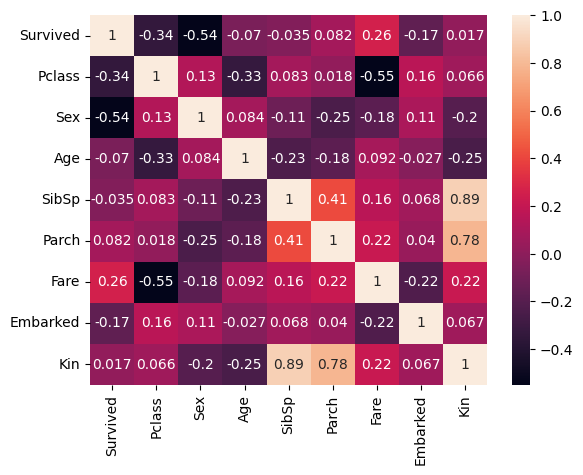

In [722]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(figsize=(12, 10))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>,
        <Axes: title={'center': 'Kin'}>]], dtype=object)

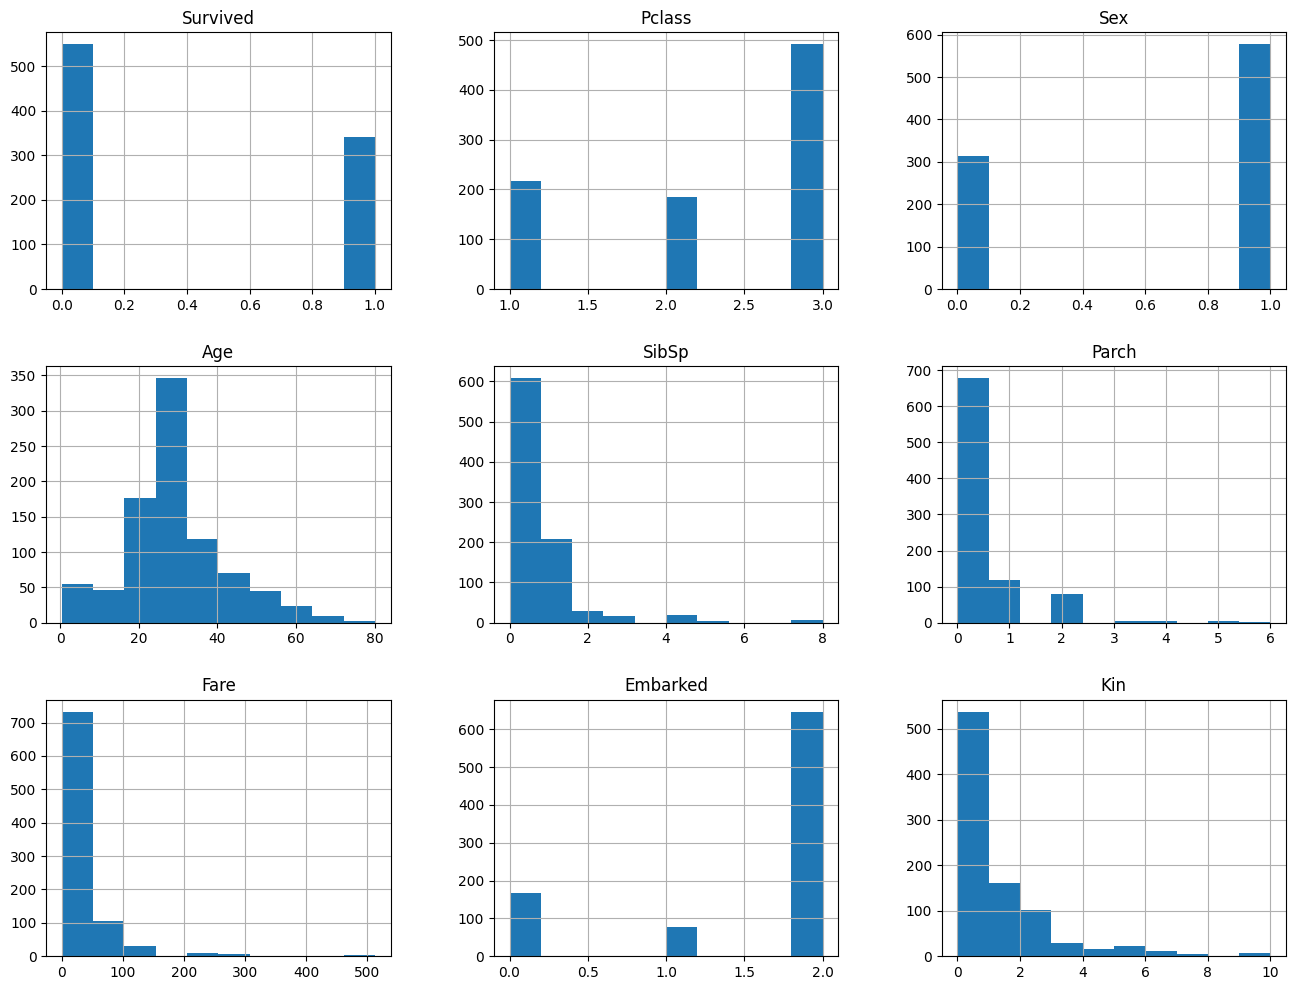

In [723]:
train_data.hist(figsize=(16, 12))

In [724]:
y_train = train_data['Survived']
train_data = train_data.drop(columns=['Survived'])

In [725]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=False)

grid = {
    'learning_rate': np.arange(0.01, 0.1, 0.01),
    'depth': np.arange(4, 9),
    'l2_leaf_reg': np.arange(0.1, 0.5, 0.1),
}

grid_search_result = model.grid_search(
    grid,
    X=train_data,
    y=y_train,
    cv=3,
    verbose=False,
)


bestTest = 0.4238943718
bestIteration = 308


bestTest = 0.4272332499
bestIteration = 127


bestTest = 0.4246599343
bestIteration = 92


bestTest = 0.4278005496
bestIteration = 54


bestTest = 0.4339418137
bestIteration = 57


bestTest = 0.4307286343
bestIteration = 57


bestTest = 0.4290280487
bestIteration = 40


bestTest = 0.434008242
bestIteration = 51


bestTest = 0.4317974015
bestIteration = 25


bestTest = 0.4267860281
bestIteration = 292


bestTest = 0.4260649928
bestIteration = 157


bestTest = 0.4303128267
bestIteration = 77


bestTest = 0.4264327781
bestIteration = 67


bestTest = 0.4293690276
bestIteration = 58


bestTest = 0.4323438087
bestIteration = 37


bestTest = 0.4302892031
bestIteration = 36


bestTest = 0.4236194078
bestIteration = 45


bestTest = 0.4195981271
bestIteration = 27


bestTest = 0.4258284781
bestIteration = 302


bestTest = 0.4280965663
bestIteration = 170


bestTest = 0.4314928688
bestIteration = 100


bestTest = 0.427418715
bestIteration = 65


best

In [726]:
grid_search_result['params']

{'depth': 7, 'learning_rate': 0.08, 'l2_leaf_reg': 0.2}

In [727]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

pred_proba_catboost = model.predict_proba(X=train_data)[:, 1]
pred_train = model.predict(train_data)

roc_auc_catboost = roc_auc_score(y_train, pred_proba_catboost)
accuracy = accuracy_score(y_train, pred_train)

print(f'catboost roc auc: {roc_auc_carboost}')
print(f'accuracy: {accuracy}')

roc auc: <function roc_auc_score at 0x79eaa5ee7880>
accuracy: 0.9820426487093153


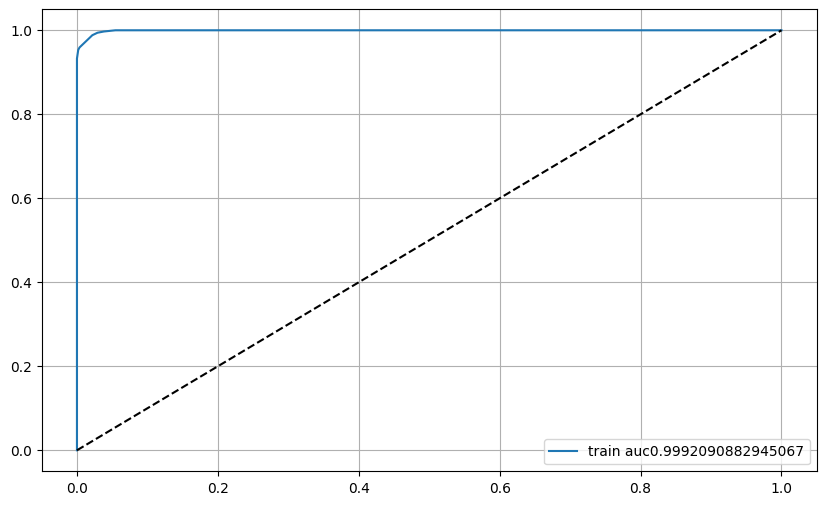

In [728]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))
plt.plot(*roc_curve(y_train, pred_proba_train)[:2], label=f'train auc{roc_auc_train}')
plt.plot([0, 1], [0, 1], '--', color='black')

plt.grid()
plt.legend()
plt.show()

In [729]:
y_pred_catboost = model.predict(score_data)

In [730]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
cross_val_scores = cross_val_score(lr, train_data, y_train, cv=3, scoring='accuracy')

print(f'mean accuracy: {np.mean(cross_val_scores)}')

mean accuracy: 0.787878787878788


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [731]:
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_scores = cross_val_score(knn, train_data, y_train, cv=3, scoring='accuracy')

print(f'mean accuracy: {np.mean(cross_val_scores)}')

mean accuracy: 0.7070707070707071


In [735]:
lr.fit(train_data, y_train)
knn.fit(train_data, y_train)

pred_proba_lr = lr.predict_proba(train_data)[:,1]
pred_proba_knn = knn.predict_proba(train_data)[:,1]

roc_auc_lr = roc_auc_score(y_train, pred_proba_lr)
roc_auc_knn = roc_auc_score(y_train, pred_proba_knn)

print(f'lr roc auc: {roc_auc_lr}')
print(f'knn roc auc: {roc_auc_knn}')

roc auc lr: 0.8576012739803364
roc auc knn: 0.8891072550836715


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred_lr = lr.predict(score_data)
y_pred_knn = knn.predict(score_data)

In [733]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

submission['Survived'] = y_pred_catboost
submission.to_csv('/kaggle/working/catboost_survived.csv', index=None)

submission['Survived'] = y_pred_lr
submission.to_csv('/kaggle/working/lr_survived.csv', index=None)

submission['Survived'] = y_pred_knn
submission.to_csv('/kaggle/working/knn_survived.csv', index=None)